In [2]:
import numpy as np
import skimage.io as io
import skimage
from skimage import io, color, img_as_float

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2
import json





In [13]:
def load_signal_model(filename):
    with open(filename) as json_file:
        return json.load(json_file)

signals = {}
signals["kshauptsignal"] = load_signal_model('../models/signals/kshauptsignal.json')
signals["kshauptsignal2"] = load_signal_model('../models/signals/kshauptsignal2.json')
signals["kshauptsignal3"] = load_signal_model('../models/signals/kshauptsignal3.json')
signals["h_v_hauptsignal"] = load_signal_model('../models/signals/h_v_hauptsignal.json')
signals["ampel"] = load_signal_model('../models/signals/ampel.json')

colors = {
    "red" : (255, 0, 0, 255),
    "green" : (0, 255, 0, 255),
    "yellow" : (255, 255, 0, 255),
    "white" : ( 255 , 255 , 255 , 255),
    "grey" : (50, 50, 50, 255)
}

def draw_signal_aspect(width,height_origin , signal):
    
    height = height_origin / 2
    image = np.zeros([height_origin,width,3])

    construct = signal['construct']
    
    #background
    for background in construct['background']:
        p = [] 
        for x,y in background:
            p.append([round(x * width),round(y * height)])
            
        bg_color = (0,0,0,255)
        pts = np.array(p , np.int32)
        cv2.fillPoly(image,[pts],bg_color)
    
    
    #lights
    for id, geo in construct['lights'].items():
        #position
        xoff = round(width * geo['x'])
        yoff = round(height * geo['y'])
        center_coordinates = (xoff,yoff)
        radius = round(width * geo['radius'])
        signal_color = colors[geo['color']]
        cv2.circle(image, center_coordinates, radius, signal_color, -1)
    return image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


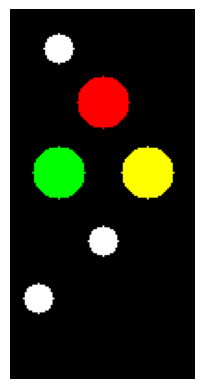

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


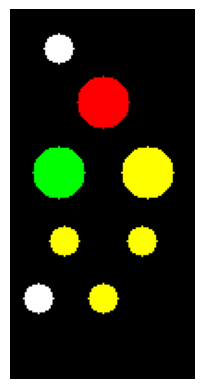

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


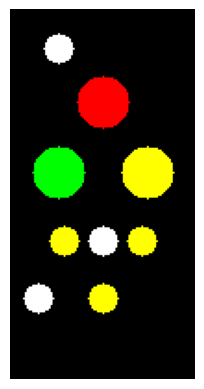

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


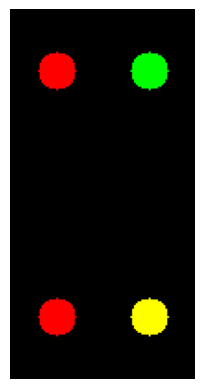

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


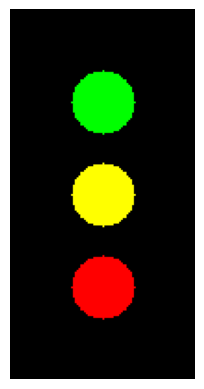

In [14]:





for t in signals:
    signal = signals[t]
    i = draw_signal_aspect(100,200,signal)

    plt.axis('off')
    plt.imshow(i)
    plt.show()


